In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/atp_matches_till_2022.csv')


Mounted at /content/drive


In [ ]:
# Converter a coluna 'tourney_date' para o formato de data
df['tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')

# Filtrar para incluir apenas os dados com ano maior ou igual a 2000
df = df[df['tourney_date'].dt.year >= 2000]

In [ ]:
df["surface_code"] = df["surface"].astype("category").cat.codes
df['tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')
df["day_code"] = df["tourney_date"].dt.dayofweek.fillna(0).astype(int)
df["month_code"] = df["tourney_date"].dt.month.fillna(0).astype(int)
df["year"] = df["tourney_date"].dt.year.fillna(0).astype(int)
df["loser_id_code"] = df["loser_id"].astype("category").cat.codes
df["winner_id_code"] = df["winner_id"].astype("category").cat.codes
df["loser_hand_code"] = df["loser_hand"].astype("category").cat.codes
df["winner_hand_code"] = df["winner_hand"].astype("category").cat.codes
df['loser_age'] = df['loser_age'].fillna(0)
df['winner_age'] = df['winner_age'].fillna(0)
df['loser_rank'] = pd.to_numeric(df['loser_rank'], errors='coerce')
df['loser_rank'] = df['loser_rank'].fillna(0).astype(int)
df['winner_rank'] = pd.to_numeric(df['winner_rank'], errors='coerce')
df['winner_rank'] = df['winner_rank'].fillna(0).astype(int)
df['loser_rank_points'] = df['loser_rank_points'].fillna(0).astype(int)
df['winner_rank_points'] = df['winner_rank_points'].fillna(0).astype(int)

In [ ]:
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,loser_rank,loser_rank_points,surface_code,day_code,month_code,year,loser_id_code,winner_id_code,loser_hand_code,winner_hand_code
119317,2000-301,Auckland,Hard,32,A,2000-01-10,1,103163,1.0,NaN,...,63,595,3,0,1,2000,20,320,0,1
119318,2000-301,Auckland,Hard,32,A,2000-01-10,2,102607,NaN,Q,...,49,723,3,0,1,2000,252,183,0,1
119319,2000-301,Auckland,Hard,32,A,2000-01-10,3,103252,NaN,NaN,...,59,649,3,0,1,2000,146,354,1,1
119320,2000-301,Auckland,Hard,32,A,2000-01-10,4,103507,7.0,NaN,...,61,616,3,0,1,2000,670,422,1,1
119321,2000-301,Auckland,Hard,32,A,2000-01-10,5,102103,NaN,Q,...,34,873,3,0,1,2000,282,83,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188156,2022-M-DC-2022-WG2-PO-GRE-JAM-01,Davis Cup WG2 PO: GRE vs JAM,Clay,4,D,2022-03-04,4,209362,NaN,NaN,...,1130,8,1,4,3,2022,2346,1606,1,1
188157,2022-M-DC-2022-WG2-PO-GRE-JAM-01,Davis Cup WG2 PO: GRE vs JAM,Clay,4,D,2022-03-04,5,202065,NaN,NaN,...,1390,4,1,4,3,2022,2235,1540,1,2
188158,2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,2022-03-04,1,138846,NaN,NaN,...,1881,1,3,4,3,2022,1257,1466,2,1
188159,2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,2022-03-04,2,209409,NaN,NaN,...,0,0,3,4,3,2022,2213,1607,1,1


In [ ]:
df['winner_seed'].isna().sum()

118467

In [ ]:
df_winners = df.copy()
df_winners = df_winners.rename(columns={
    'winner_name': 'atleta_name',
    'winner_rank': 'atleta_rank',
    'winner_rank_points': 'atleta_rank_points',
    'winner_hand_code': 'atleta_hand_code',
    'winner_age': 'atleta_age',
    'winner_id_code': 'atleta_id_code',
    'loser_name': 'oponente_name',
    'loser_rank': 'oponente_rank',
    'loser_rank_points': 'oponente_rank_points',
    'loser_hand_code': 'oponente_hand_code',
    'loser_age': 'oponente_age',
    'loser_id_code': 'oponente_id_code'
})
# Adicionado a coluna 'resultado' com valor 1 para o vencedor
df_winners['resultado'] = 1

df_losers = df.copy()
df_losers = df_losers.rename(columns={
    'winner_name': 'oponente_name',
    'winner_rank': 'oponente_rank',
    'winner_rank_points': 'oponente_rank_points',
    'winner_hand_code': 'oponente_hand_code',
    'winner_age': 'oponente_age',
    'winner_id_code': 'oponente_id_code',
    'loser_name': 'atleta_name',
    'loser_rank': 'atleta_rank',
    'loser_rank_points': 'atleta_rank_points',
    'loser_hand_code': 'atleta_hand_code',
    'loser_age': 'atleta_age',
    'loser_id_code': 'atleta_id_code'
})
# Adicionado a coluna 'resultado' com valor 0 para o perdedor
df_losers['resultado'] = 0

df = pd.concat([df_winners, df_losers], ignore_index=True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)
train, test = train_test_split(df, test_size=0.2, random_state=42)
predictors = ['best_of', 'draw_size', 'oponente_rank', 'oponente_rank_points', 'oponente_hand_code', 'oponente_age', 'oponente_id_code', 'atleta_rank', 'atleta_rank_points', 'atleta_hand_code', 'atleta_age', 'atleta_id_code', 'surface_code', 'year', 'day_code', 'month_code']


In [ ]:
predi = rf.fit(train[predictors], train["resultado"])

In [ ]:
preds = rf.predict(test[predictors])
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(test["resultado"], preds)
acuracia

0.9204942536371488

In [ ]:
combined = pd.DataFrame(dict(actual=test["resultado"], predicted=preds))
contingency_table = pd.crosstab(index=combined["actual"], columns=combined["predicted"])
contingency_table

predicted,0,1
actual,,
0,13201,431
1,438,13468


In [ ]:
# Calcular as métricas
TP = contingency_table[1][1]  # Verdadeiros Positivos
TN = contingency_table[0][0]  # Verdadeiros Negativos
FP = contingency_table[0][1]  # Falsos Positivos
FN = contingency_table[1][0]  # Falsos Negativos

sensibilidade = TP / (TP + FN)
especificidade = TN / (TN + FP)
precisao = TP / (TP + FP)
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

# Exibir as métricas
print(f"Sensibilidade: {sensibilidade}")
print(f"Especificidade: {especificidade}")
print(f"Precisão: {precisao}")
print(f"F-score: {f_score}")


Sensibilidade: 0.9689905748615009
Especificidade: 0.9678862086663245
Precisão: 0.9685028045448008
F-score: 0.9687466283042618


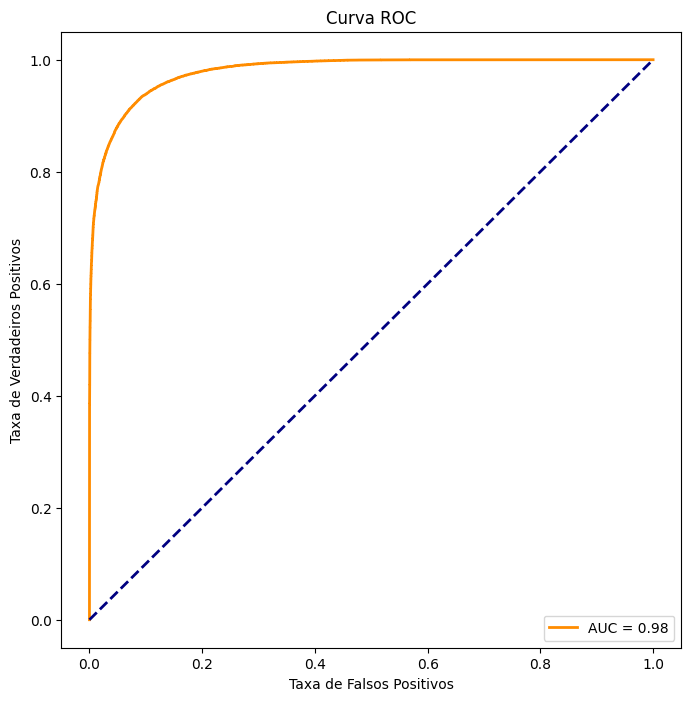

In [ ]:
# Fazer previsões no conjunto de teste
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
X_train = train[predictors]
y_train = train["resultado"]
X_test = test[predictors]
y_test = test["resultado"]

# Treinar o modelo
rf.fit(X_train, y_train)

# Calcular probabilidades previstas
y_scores = rf.predict_proba(X_test)[:, 1]

# Calcular a Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotar a Curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

# Calcular probabilidades previstas
y_scores = rf.predict_proba(X_test)[:, 1]

# Calcular a Área Sob a Curva ROC (AUC-ROC)
roc_auc = roc_auc_score(y_test, y_scores)

print(f'AUC-ROC: {roc_auc:.2f}')

AUC-ROC: 0.98


In [ ]:
predictions = predi.predict(test[predictors])
y_test = test["resultado"]

# Encontrar os índices onde as previsões estão incorretas
indices_erros = (predictions != y_test)

# Obter os índices dos dados errados
indices = test.index[indices_erros].tolist()
test['resultado_previsto'] = predictions

test.loc[indices, ['resultado', 'resultado_previsto', 'atleta_name', 'oponente_name', 'tourney_name', 'tourney_date']]


,resultado,resultado_previsto,atleta_name,oponente_name,tourney_name,tourney_date
9274,1,0,Julien Boutter,Gustavo Kuerten,Australian Open,2002-01-14
2605,1,0,Albert Portas,Gustavo Kuerten,Australian Open,2000-01-17
13087,1,0,Daniel Nestor,Gustavo Kuerten,Davis Cup WG PO: CAN vs BRA,2003-09-19
21908,1,0,Andre Ghem,Gustavo Kuerten,Costa Do Sauipe,2006-02-20
2447,1,0,Wayne Arthurs,Gustavo Kuerten,US Open,2000-08-28
4817,1,0,Andy Roddick,Gustavo Kuerten,Canada Masters,2001-07-30
72845,0,1,Bohdan Ulihrach,Gustavo Kuerten,Paris Masters,2001-10-29
93918,0,1,Filippo Volandri,Gustavo Kuerten,Costa Do Sauipe,2007-02-12


FEMININO

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/matches.csv')


In [ ]:
df = df.drop(columns = ['loser_entry', 'winner_entry']) # Irrelevantes
df = df.iloc[:, :-1]

In [ ]:
df["surface_code"] = df["surface"].astype("category").cat.codes
df.loc[11906, 'tourney_date'] = np.nan # Estava vindo com o valor 'Hard'
df['tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')
df["day_code"] = df["tourney_date"].dt.dayofweek.fillna(0).astype(int)
df["month_code"] = df["tourney_date"].dt.month.fillna(0).astype(int)
df["year"] = df["tourney_date"].dt.year.fillna(0).astype(int)
df["loser_id_code"] = df["loser_id"].astype("category").cat.codes
df["winner_id_code"] = df["winner_id"].astype("category").cat.codes
df["loser_hand_code"] = df["loser_hand"].astype("category").cat.codes
df["winner_hand_code"] = df["winner_hand"].astype("category").cat.codes
df['loser_age'] = df['loser_age'].fillna(0)
df['winner_age'] = df['winner_age'].fillna(0)
df['loser_rank'] = pd.to_numeric(df['loser_rank'], errors='coerce') # Substituir valores não numéricos por NaN
df['loser_rank'] = df['loser_rank'].fillna(0).astype(int)
df['winner_rank'] = pd.to_numeric(df['winner_rank'], errors='coerce') # Substituir valores não numéricos por NaN
df['winner_rank'] = df['winner_rank'].fillna(0).astype(int)
df['loser_rank_points'] = df['loser_rank_points'].fillna(0).astype(int)
df['winner_rank_points'] = df['winner_rank_points'].fillna(0).astype(int)
df['loser_seed'] = df['loser_seed'].replace('Q', np.nan)


In [ ]:
# Criado uma cópia do DataFrame original para os vencedores (winners)
df_winners = df.copy()
# Renomeado as colunas do vencedor
df_winners = df_winners.rename(columns={
    'winner_name': 'atleta_name',
    'winner_rank': 'atleta_rank',
    'winner_rank_points': 'atleta_rank_points',
    'winner_hand_code': 'atleta_hand_code',
    'winner_age': 'atleta_age',
    'winner_id_code': 'atleta_id_code',
    'winner_seed': 'atleta_seed',
    'loser_name': 'oponente_name',
    'loser_rank': 'oponente_rank',
    'loser_rank_points': 'oponente_rank_points',
    'loser_hand_code': 'oponente_hand_code',
    'loser_age': 'oponente_age',
    'loser_id_code': 'oponente_id_code',
    'loser_seed': 'oponente_seed'
})
# Adicionado a coluna 'resultado' com valor 1 para o vencedor
df_winners['resultado'] = 1

# Criado uma cópia do DataFrame original para os perdedores (losers)
df_losers = df.copy()
# Renomeado as colunas do perdedor
df_losers = df_losers.rename(columns={
    'winner_name': 'oponente_name',
    'winner_rank': 'oponente_rank',
    'winner_rank_points': 'oponente_rank_points',
    'winner_hand_code': 'oponente_hand_code',
    'winner_age': 'oponente_age',
    'winner_id_code': 'oponente_id_code',
    'winner_seed': 'oponente_seed',
    'loser_name': 'atleta_name',
    'loser_rank': 'atleta_rank',
    'loser_rank_points': 'atleta_rank_points',
    'loser_hand_code': 'atleta_hand_code',
    'loser_age': 'atleta_age',
    'loser_id_code': 'atleta_id_code',
    'loser_seed': 'atleta_seed'
})
# Adicionado a coluna 'resultado' com valor 0 para o perdedor
df_losers['resultado'] = 0

# Concatenado os DataFrames dos vencedores e perdedores em um único DataFrame
df = pd.concat([df_winners, df_losers], ignore_index=True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)
train, test = train_test_split(df, test_size=0.2, random_state=42)
predictors = ['best_of', 'draw_size', 'oponente_rank', 'oponente_rank_points',
              'oponente_hand_code', 'oponente_age', 'oponente_id_code',
              'oponente_seed', 'atleta_rank', 'atleta_rank_points',
              'atleta_hand_code', 'atleta_age', 'atleta_id_code',
              'atleta_seed', 'surface_code', 'minutes', 'year', 'day_code',
              'month_code']


In [ ]:
rf.fit(train[predictors], train["resultado"])
preds = rf.predict(test[predictors])

In [ ]:
from sklearn.metrics import accuracy_score
error = accuracy_score(test["resultado"], preds)
error

In [ ]:
combined = pd.DataFrame(dict(actual=test["resultado"], predicted=preds))
contingency_table = pd.crosstab(index=combined["actual"], columns=combined["predicted"])


In [ ]:
# Calcular as métricas
TP = contingency_table[1][1]  # Verdadeiros Positivos
TN = contingency_table[0][0]  # Verdadeiros Negativos
FP = contingency_table[0][1]  # Falsos Positivos
FN = contingency_table[1][0]  # Falsos Negativos

sensibilidade = TP / (TP + FN)
especificidade = TN / (TN + FP)
precisao = TP / (TP + FP)
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

# Exibir as métricas
print(f"Sensibilidade: {sensibilidade}")
print(f"Especificidade: {especificidade}")
print(f"Precisão: {precisao}")
print(f"F-score: {f_score}")


In [ ]:
# Fazer previsões no conjunto de teste
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
X_train = train[predictors]
y_train = train["resultado"]
X_test = test[predictors]
y_test = test["resultado"]

# Treinar o modelo
rf.fit(X_train, y_train)

# Calcular probabilidades previstas
y_scores = rf.predict_proba(X_test)[:, 1]

# Calcular a Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotar a Curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()